In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import cm
from skimage.io import imread
import cv2

In [2]:
import pandas as pd
import keras

Using TensorFlow backend.
/home/antonis/anaconda2/envs/kaggle/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
import glob

In [4]:
#Read training data
df = pd.read_csv('train_onelabel.csv',index_col='image')

In [5]:
#create useful dicts 

# mapping images-class IDs
get_class_of = df['class'].to_dict()
get_images_of = df.groupby('class').apply(lambda x: x.values.tolist()).to_dict()


In [6]:
#Read label mapping
df_label_map = pd.read_csv('label_map.txt',header=None,names=['name','id'],sep=' ')

# mapping class IDs-class names
get_name_of_class = df_label_map['name'].to_dict()
'''
    Usage:
    get_name_of_class[9]
    >> 'ctenophore_cydippid_tentacles'
'''

get_class_name_of = {v: k for k, v in get_name_of_class.items()}
'''
    Usage:
    get_class_name_of['ctenophore_cydippid_tentacles']
    >> 9
'''

"\n    Usage:\n    get_class_name_of['ctenophore_cydippid_tentacles']\n    >> 9\n"

# Analytics

In [7]:
training_paths = glob.glob('competition_data/train_images/*')
test_paths = glob.glob('competition_data/test_images/*')
print(('Number of training images: %i \nNumber of test images: %i (%.2f%%)')%(len(training_paths), len(test_paths),(100*len(test_paths)/len(training_paths))))

Number of training images: 24204 
Number of test images: 6132 (25.33%)


** How many imgs per class? **

In [25]:
class_analytics = df['class'].copy().value_counts()

In [26]:
class_analytics.index = map(lambda x: get_name_of_class[x],class_analytics.index)

In [28]:
class_analytics.tail()

acantharia_protist_big_center            9
hydromedusae_typeE                       9
hydromedusae_haliscera_small_sideview    7
ephyra                                   7
heteropod                                7
Name: class, dtype: int64

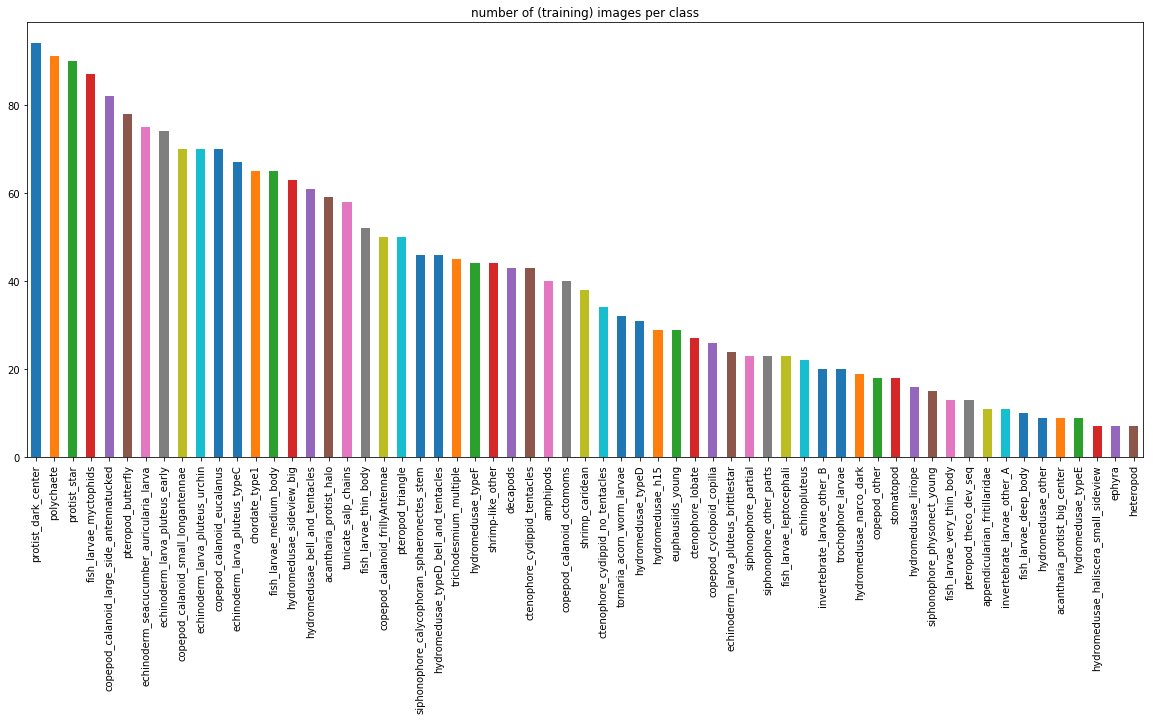

In [29]:
class_analytics[60:].plot(kind='bar',figsize=(20,8),title='number of (training) images per class')

### Display random images of classes

** Image sizes **

In [60]:
tr_path = 'competition_data/train_images/'
te_path = 'competition_data/test_images/'

In [53]:
df['width'] = df.index.map(lambda filename: plt.imread(tr_path+filename).shape[0])
df['height'] = df.index.map(lambda filename: plt.imread(tr_path+filename).shape[1])

In [65]:
df_test = pd.DataFrame(index=test_paths)
df_test['width'] = df_test.index.map(lambda filename: plt.imread(filename).shape[0])
df_test['height'] = df_test.index.map(lambda filename: plt.imread(filename).shape[1])

In [58]:
df.drop('class',axis=1).describe()

,width,height
count,24204.000000,24204.000000
mean,66.468972,73.321104
std,43.298515,48.757926
min,21.000000,31.000000
25%,43.000000,44.000000
50%,53.000000,55.000000
75%,72.000000,83.000000
max,428.000000,424.000000


In [66]:
df_test.describe()

,width,height
count,6132.000000,6132.000000
mean,67.423027,74.242172
std,44.091671,50.727201
min,21.000000,31.000000
25%,43.000000,44.000000
50%,53.000000,56.000000
75%,73.000000,82.000000
max,423.000000,422.000000


In [100]:
import seaborn as sns

In [97]:
all_df = df.copy()
all_df['training'] =True
test_df = df_test.copy()
test_df['training'] =False
all_df = all_df.append(test_df)

In [98]:
all_df.training.value_counts()

True     24204
False     6132
Name: training, dtype: int64

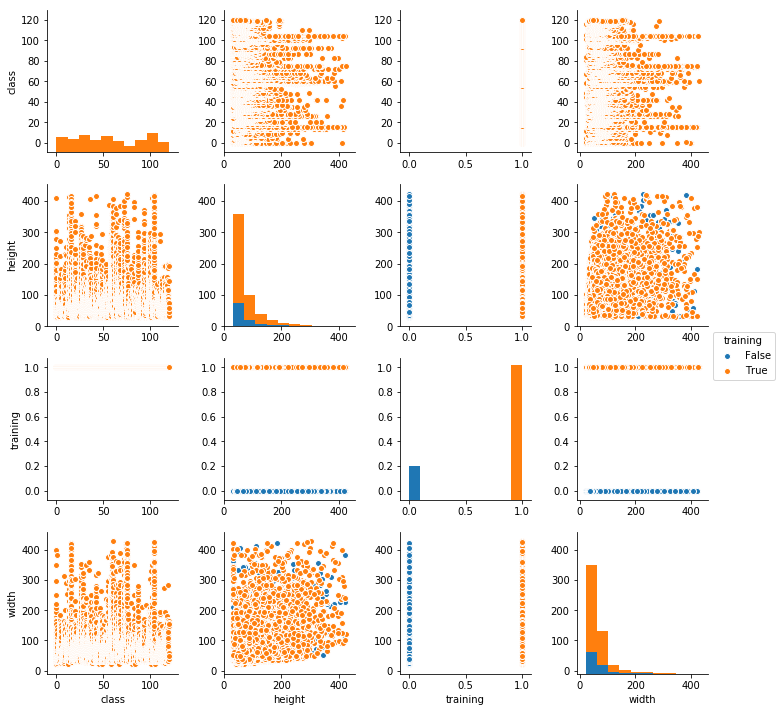

In [99]:
sns.pairplot(all_df,hue='training')

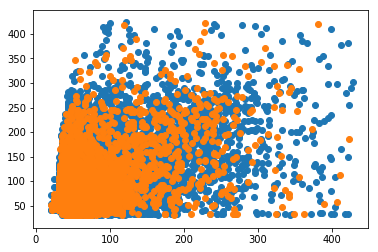

In [71]:
plt.scatter(x= df.width,y=df.height,)
plt.scatter(x= df_test.width,y=df_test.height,)

# TODO: 
apply denoising -> crop image -> apply stretching to bring it back to 48x48 / 64x64 etc

# Image denoising efforts

In [26]:
imgpath = training_paths[22]

In [27]:
img = cv2.imread(imgpath,0)
cv2.imshow('image',img)

In [28]:
img_2 = cv2.fastNlMeansDenoising(img)

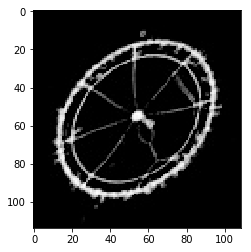

In [29]:
plt.imshow(img, cmap=cm.gray_r)

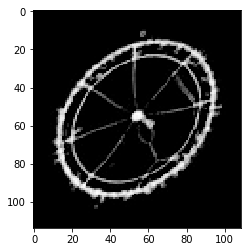

In [30]:
plt.imshow(img_2, cmap=cm.gray_r)

# TODOS
### ~~1. Get all filenames of directory~~
### 2. Get each image in a matrix as a flat array of pixels (?)
### 3. Denoise image (use opencv.fastNlMeansDenoisingMulti()  ?)
### 4. add in df size of images (train? + test)
### 5. apply some random transformations and add them into training set (<a href='https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations'>ref here</a>)



In [31]:
# im = imread(training_paths[3], as_grey=True)

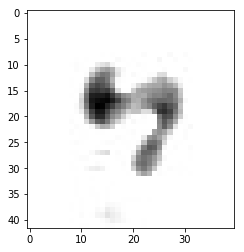

In [32]:
# plt.imshow(im, cmap=cm.gray)
# plt.show()

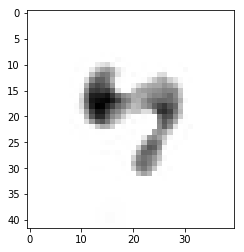

In [72]:
# im_denoised = cv2.fastNlMeansDenoising(im) 
# plt.imshow(im_denoised, cmap=cm.gray)

In [87]:
im_denoised*im_denoised

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [85]:
im.shape

(42, 40)

In [68]:
df.loc['9143.jpg']

class    0
Name: 9143.jpg, dtype: int64